In [1]:
import pandas as pd
import numpy as np
df_athletes = pd.read_csv("Data/athletesMenGames2019.csv",sep=';',na_values = ['--']);
df_athletes.drop(['CountryCode','RegionalName','RegionName','RegionCode','RegionalCode','Rn5k'],axis=1,inplace=True);
df_athletes.dropna(how = 'all', subset = ['CleanAndJerk_kg','Snatch_kg','DeadLift_kg','FightGoneBad','MaxPullUps','Fran','Grace','Helen','Filthy50','Sprint400m'],inplace = True)

In [2]:
df_athletes[df_athletes['Height_cm']<150]

,CompetitorId,CompetitorName,FirstName,LastName,Gender,Age,RegionId,Profession,Height_cm,Weight_kg,...,CleanAndJerk_kg,Snatch_kg,DeadLift_kg,FightGoneBad,MaxPullUps,Fran,Grace,Helen,Filthy50,Sprint400m
28,191624,Alvaro Lopez,Alvaro,Lopez,M,33,0,0,8.54,83.91452,...,151.95332,115.66596,233.59988,NaN,65.0,2:01,1:39,NaN,NaN,NaN


In [3]:
df_athletes.loc[df_athletes['CompetitorId']==191624,'Height_cm'] = 170.18;
df_athletes['BMI']=df_athletes['Weight_kg']/np.square(df_athletes['Height_cm']/100)

In [4]:
feat_drop = ['Gender','RegionId','Profession','AffiliateId','DivisionId','CountryOfOriginCode']
df_strength = df_athletes.drop(feat_drop,axis=1);
df_strength['BMI'].describe()

count    100.000000
mean      30.388740
std        2.609638
min       23.889400
25%       28.663374
50%       31.222474
75%       32.403863
max       34.427823
Name: BMI, dtype: float64

In [5]:
# check that we have only NaN and values with ":" in column 'Fran'
df_strength[df_strength['Fran'].str.contains(r':') & df_strength['Fran'].notnull()]['CompetitorId'].count() + \
df_strength[df_strength['Fran'].isnull()]['CompetitorId'].count() == df_strength['CompetitorId'].count()

True

In [6]:
def min_sec_to_sec(min_sec):
    if (type(min_sec)!=float):
        return int(min_sec.split(':')[0])*60+int(min_sec.split(':')[1])
    return min_sec

def sec_to_min_sec(sec):
    if(~np.isnan(sec)):
        mins = int(sec//60)
        sec = '0'+str(int(sec%60))
        return str(mins) + ':' +sec[-2:]
    return sec

In [7]:
df_strength['Fran_sec'] = df_strength['Fran'].apply(min_sec_to_sec)
df_strength['Grace_sec'] = df_strength['Grace'].apply(min_sec_to_sec)
df_strength['Helen_sec'] = df_strength['Helen'].apply(min_sec_to_sec)
df_strength['Filthy50_sec'] = df_strength['Filthy50'].apply(min_sec_to_sec)
df_strength['Sprint400m_sec'] = df_strength['Sprint400m'].apply(min_sec_to_sec)

In [26]:
def strengthMeanByMovement(df,movement,groupedBy):
    df_movement = df[df[movement].notnull()].reset_index();
    min = int(round(df[groupedBy].min()))
    max = int(round(df[groupedBy].max()))
    df_movement[groupedBy+' range'] = pd.cut(df_movement[groupedBy],range(min//1,max+3,2), include_lowest=True)
    df_movement = df_movement[[groupedBy+' range',movement]]
    df_movement = round(df_movement.groupby(groupedBy+' range').mean())
    return df_movement

In [27]:
df_BackSquat = strengthMeanByMovement(df_strength,'BackSquat_kg','BMI')
df_BackSquat

,BackSquat_kg
BMI range,
"(23.999, 26.0]",175.0
"(26.0, 28.0]",179.0
"(28.0, 30.0]",188.0
"(30.0, 32.0]",195.0
"(32.0, 34.0]",202.0
"(34.0, 36.0]",206.0


In [28]:
df_CleanAndJerk = strengthMeanByMovement(df_strength,'CleanAndJerk_kg','BMI')
df_CleanAndJerk

,CleanAndJerk_kg
BMI range,
"(23.999, 26.0]",138.0
"(26.0, 28.0]",137.0
"(28.0, 30.0]",143.0
"(30.0, 32.0]",144.0
"(32.0, 34.0]",154.0
"(34.0, 36.0]",161.0


In [29]:
df_Snatch = strengthMeanByMovement(df_strength,'Snatch_kg','BMI')
df_Snatch

,Snatch_kg
BMI range,
"(23.999, 26.0]",112.0
"(26.0, 28.0]",111.0
"(28.0, 30.0]",120.0
"(30.0, 32.0]",116.0
"(32.0, 34.0]",125.0
"(34.0, 36.0]",132.0


In [30]:
df_DeadLift = strengthMeanByMovement(df_strength,'DeadLift_kg','BMI')
df_DeadLift

,DeadLift_kg
BMI range,
"(23.999, 26.0]",213.0
"(26.0, 28.0]",206.0
"(28.0, 30.0]",221.0
"(30.0, 32.0]",224.0
"(32.0, 34.0]",238.0
"(34.0, 36.0]",255.0


In [31]:
df_FightGoneBad = strengthMeanByMovement(df_strength,'FightGoneBad','BMI')
df_FightGoneBad['FightGoneBad'].fillna("--", inplace= True)
df_FightGoneBad

,FightGoneBad
BMI range,
"(23.999, 26.0]",436
"(26.0, 28.0]",--
"(28.0, 30.0]",410
"(30.0, 32.0]",432
"(32.0, 34.0]",462
"(34.0, 36.0]",457


In [32]:
df_MaxPullUps = strengthMeanByMovement(df_strength,'MaxPullUps','BMI')
df_MaxPullUps

,MaxPullUps
BMI range,
"(23.999, 26.0]",47.0
"(26.0, 28.0]",55.0
"(28.0, 30.0]",62.0
"(30.0, 32.0]",60.0
"(32.0, 34.0]",62.0
"(34.0, 36.0]",66.0


In [33]:
df_Fran = strengthMeanByMovement(df_strength,'Fran_sec','BMI')
df_Fran['Fran'] = df_Fran['Fran_sec'].apply(sec_to_min_sec)
df_Fran.drop(['Fran_sec'],axis=1,inplace=True)
df_Fran

,Fran
BMI range,
"(23.999, 26.0]",2:35
"(26.0, 28.0]",2:41
"(28.0, 30.0]",2:23
"(30.0, 32.0]",2:34
"(32.0, 34.0]",2:11
"(34.0, 36.0]",2:07


In [34]:
df_Grace = strengthMeanByMovement(df_strength,'Grace_sec','BMI')
df_Grace['Grace'] = df_Grace['Grace_sec'].apply(sec_to_min_sec)
df_Grace.drop(['Grace_sec'],axis=1,inplace=True)
df_Grace

,Grace
BMI range,
"(23.999, 26.0]",1:59
"(26.0, 28.0]",2:26
"(28.0, 30.0]",1:46
"(30.0, 32.0]",1:50
"(32.0, 34.0]",1:28
"(34.0, 36.0]",1:16


In [35]:
df_Helen = strengthMeanByMovement(df_strength,'Helen_sec','BMI')
df_Helen['Helen'] = df_Helen['Helen_sec'].apply(sec_to_min_sec)
df_Helen.drop(['Helen_sec'],axis=1,inplace=True)
df_Helen.fillna("--", inplace= True)
df_Helen

,Helen
BMI range,
"(23.999, 26.0]",13:52
"(26.0, 28.0]",8:09
"(28.0, 30.0]",7:17
"(30.0, 32.0]",7:51
"(32.0, 34.0]",7:22
"(34.0, 36.0]",7:12


In [36]:
df_Filthy50 = strengthMeanByMovement(df_strength,'Filthy50_sec','BMI')
df_Filthy50['Filthy50'] = df_Filthy50['Filthy50_sec'].apply(sec_to_min_sec)
df_Filthy50.drop(['Filthy50_sec'],axis=1,inplace=True)
df_Filthy50.fillna("--", inplace= True)
df_Filthy50

,Filthy50
BMI range,
"(23.999, 26.0]",21:33
"(26.0, 28.0]",21:24
"(28.0, 30.0]",19:14
"(30.0, 32.0]",18:44
"(32.0, 34.0]",16:15
"(34.0, 36.0]",14:54


In [37]:
df_Sprint400m = strengthMeanByMovement(df_strength,'Sprint400m_sec','BMI')
df_Sprint400m['Sprint400m'] = df_Sprint400m['Sprint400m_sec'].apply(sec_to_min_sec)
df_Sprint400m.drop(['Sprint400m_sec'],axis=1,inplace=True)
df_Sprint400m.fillna("--", inplace= True)
df_Sprint400m

,Sprint400m
BMI range,
"(23.999, 26.0]",1:04
"(26.0, 28.0]",1:05
"(28.0, 30.0]",1:05
"(30.0, 32.0]",0:59
"(32.0, 34.0]",0:59
"(34.0, 36.0]",1:20


In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

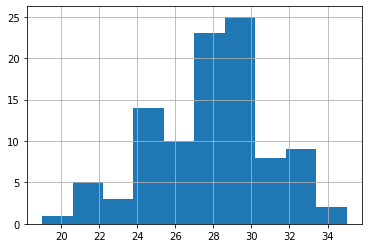

In [21]:
df_athletes['Age'].hist();

In [38]:
print('Men athletes in CrossFit Games 2019:')
print('Mean values for strength marks selected by BMI range')
df_meanByStrength = pd.concat([df_BackSquat, df_CleanAndJerk,df_Snatch,df_DeadLift],axis=1)
df_meanByStrength

Men athletes in CrossFit Games 2019:
Mean values for strength marks selected by BMI range


,BackSquat_kg,CleanAndJerk_kg,Snatch_kg,DeadLift_kg
BMI range,,,,
"(23.999, 26.0]",175.0,138.0,112.0,213.0
"(26.0, 28.0]",179.0,137.0,111.0,206.0
"(28.0, 30.0]",188.0,143.0,120.0,221.0
"(30.0, 32.0]",195.0,144.0,116.0,224.0
"(32.0, 34.0]",202.0,154.0,125.0,238.0
"(34.0, 36.0]",206.0,161.0,132.0,255.0


In [39]:
print('Mean values for benchmarks wod-s selected by BMI range')
df_meanByBenchMark = pd.concat([df_FightGoneBad, df_MaxPullUps,df_Fran,df_Grace, df_Helen, df_Filthy50, df_Sprint400m],axis=1)
df_meanByBenchMark

Mean values for benchmarks wod-s selected by BMI range


,FightGoneBad,MaxPullUps,Fran,Grace,Helen,Filthy50,Sprint400m
BMI range,,,,,,,
"(23.999, 26.0]",436,47.0,2:35,1:59,13:52,21:33,1:04
"(26.0, 28.0]",--,55.0,2:41,2:26,8:09,21:24,1:05
"(28.0, 30.0]",410,62.0,2:23,1:46,7:17,19:14,1:05
"(30.0, 32.0]",432,60.0,2:34,1:50,7:51,18:44,0:59
"(32.0, 34.0]",462,62.0,2:11,1:28,7:22,16:15,0:59
"(34.0, 36.0]",457,66.0,2:07,1:16,7:12,14:54,1:20
